###Procesamiento de las Series de Tiempo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/Calamar.csv')
#df.columns = ['fecha', 'caudal']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27741 entries, 0 to 27740
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CodigoEstacion    27741 non-null  int64  
 1   NombreEstacion    27741 non-null  object 
 2   Latitud           27741 non-null  float64
 3   Longitud          27741 non-null  float64
 4   Altitud           27741 non-null  int64  
 5   Categoria         27741 non-null  object 
 6   Entidad           27741 non-null  object 
 7   AreaOperativa     27741 non-null  object 
 8   Departamento      27741 non-null  object 
 9   Municipio         27741 non-null  object 
 10  FechaInstalacion  27741 non-null  object 
 11  FechaSuspension   953 non-null    object 
 12  IdParametro       27741 non-null  object 
 13  Etiqueta          27741 non-null  object 
 14  DescripcionSerie  27741 non-null  object 
 15  Frecuencia        27741 non-null  object 
 16  Fecha             27741 non-null  object

In [ ]:
df.IdParametro.unique()

array(['CAUDAL', 'TEMPERATURA'], dtype=object)

In [ ]:
df=df[df.IdParametro == 'CAUDAL']
df

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,29037020,CALAMAR [29037020],10.253861,-74.911694,8,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 02 - Atlántico-Bolivar-Sucre,Bolivar,Calamar,...,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,1950-01-01 00:00,9266.000000,50,NaN,900
1,29037020,CALAMAR [29037020],10.253861,-74.911694,8,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 02 - Atlántico-Bolivar-Sucre,Bolivar,Calamar,...,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,1950-01-02 00:00,9130.000000,50,NaN,900
2,29037020,CALAMAR [29037020],10.253861,-74.911694,8,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 02 - Atlántico-Bolivar-Sucre,Bolivar,Calamar,...,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,1950-01-03 00:00,8926.000000,50,NaN,900
3,29037020,CALAMAR [29037020],10.253861,-74.911694,8,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 02 - Atlántico-Bolivar-Sucre,Bolivar,Calamar,...,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,1950-01-04 00:00,8705.000000,50,NaN,900
4,29037020,CALAMAR [29037020],10.253861,-74.911694,8,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 02 - Atlántico-Bolivar-Sucre,Bolivar,Calamar,...,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,1950-01-05 00:00,8370.000000,50,NaN,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26783,29037020,CALAMAR [29037020],10.253861,-74.911694,8,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 02 - Atlántico-Bolivar-Sucre,Bolivar,Calamar,...,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,2024-02-19 00:00,3045.375000,50,NaN,900
26784,29037020,CALAMAR [29037020],10.253861,-74.911694,8,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 02 - Atlántico-Bolivar-Sucre,Bolivar,Calamar,...,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,2024-02-20 00:00,3057.234375,50,NaN,900
26785,29037020,CALAMAR [29037020],10.253861,-74.911694,8,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 02 - Atlántico-Bolivar-Sucre,Bolivar,Calamar,...,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,2024-02-21 00:00,3097.968750,50,NaN,900
26786,29037020,CALAMAR [29037020],10.253861,-74.911694,8,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 02 - Atlántico-Bolivar-Sucre,Bolivar,Calamar,...,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,2024-02-22 00:00,3046.921875,50,NaN,900


In [ ]:
df = df[['Fecha', 'Valor']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26788 entries, 0 to 26787
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   26788 non-null  object 
 1   Valor   26788 non-null  float64
dtypes: float64(1), object(1)
memory usage: 627.8+ KB


In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.sort_index(inplace=True)

<ipython-input-6-40b03ba32ba9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha'] = pd.to_datetime(df['Fecha'])


In [ ]:
print('Cantidad de datos faltantes:')
for column in df:
    nans = df[column].isna().sum()
    print(f'\tColumna {column}: {nans}')

Cantidad de datos faltantes:
	Columna Fecha: 0
	Columna Valor: 0


In [ ]:
df['anio'] = df['Fecha'].dt.year
df['mes'] = df['Fecha'].dt.month

<ipython-input-8-bf2630a40fc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anio'] = df['Fecha'].dt.year
<ipython-input-8-bf2630a40fc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mes'] = df['Fecha'].dt.month


In [ ]:
df_caudal = df[['anio', 'mes', 'Valor']]
df_caudal

,anio,mes,Valor
0,1950,1,9266.000000
1,1950,1,9130.000000
2,1950,1,8926.000000
3,1950,1,8705.000000
4,1950,1,8370.000000
...,...,...,...
26783,2024,2,3045.375000
26784,2024,2,3057.234375
26785,2024,2,3097.968750
26786,2024,2,3046.921875


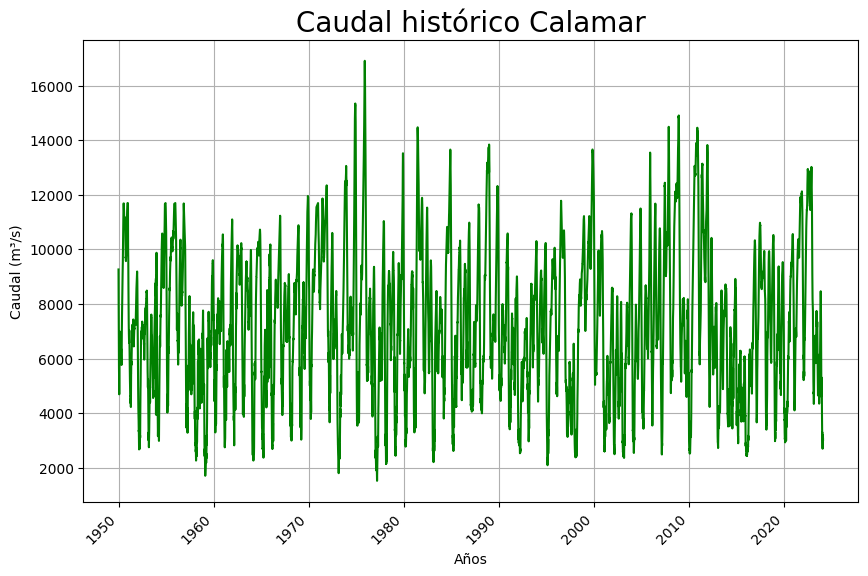

In [ ]:
# Configurar el gráfico con fechas en el eje x
plt.figure(figsize = (10,6))
plt.plot(df['Fecha'], df['Valor'], color = 'green')

# Personalizar el formato de las fechas en el eje x (opcional)
plt.xticks(rotation=45, ha='right')  # Rotar las fechas para una mejor legibilidad
plt.title("Caudal histórico Calamar", fontsize = 20)
plt.xlabel("Años")
plt.ylabel("Caudal (m³/s)")
plt.grid()

# Mostrar el gráfico
plt.savefig("HistoricoCalamar")
plt.show()


7303.014879333036

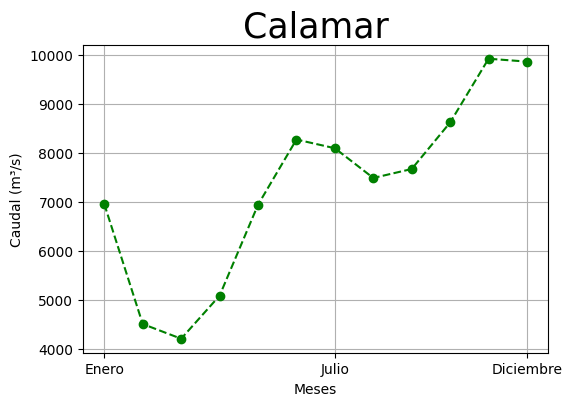

In [ ]:
CaudalCalamar = df_caudal.groupby('mes').mean().reset_index()
plt.figure(figsize = (6,4))
plt.plot(CaudalCalamar['mes'], CaudalCalamar['Valor'], marker = "o",  linestyle = "--", color = "green")
plt.title("Calamar", fontsize = 25)
plt.xlabel("Meses")
plt.ylabel("Caudal (m³/s)")
x = [1,7,12]
meses = ['Enero',  "Julio",  "Diciembre"]
plt.xticks(x, meses)
plt.grid()
plt.savefig("Calamar")
np.mean(CaudalCalamar['Valor'])

In [ ]:
df_caudal.groupby('anio').mean().reset_index()

,anio,mes,Valor
0,1950,6.335277,8831.475219
1,1951,6.526027,7049.191781
2,1952,6.513661,6191.849727
3,1953,6.526027,6088.994521
4,1954,6.187135,7694.277778
...,...,...,...
70,2020,6.513661,6484.114924
71,2021,6.526027,9134.179418
72,2022,6.495868,10355.560985
73,2023,6.571823,6313.019665


7303.014879333036

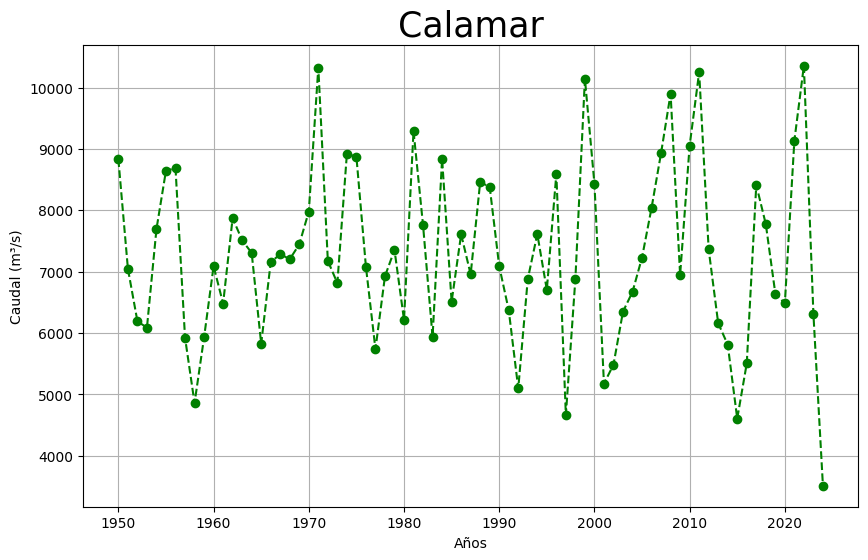

In [ ]:
CaudalCalamarAnio = df_caudal.groupby('anio').mean().reset_index()
plt.figure(figsize = (10,6))
plt.plot(CaudalCalamarAnio['anio'], CaudalCalamarAnio['Valor'], marker = "o",  linestyle = "--", color = "green")
plt.title("Calamar", fontsize = 25)
plt.xlabel("Años")
plt.ylabel("Caudal (m³/s)")
plt.grid()
plt.savefig("Calamar_anio")
np.mean(CaudalCalamar['Valor'])

In [ ]:
calamar = df_caudal.groupby(['anio', 'mes']).mean().reset_index()

In [ ]:
import re

file=open('/content/NINO3.txt','r', encoding='utf-8')
infile=file.readlines()
NINO3 = []
for linea in infile:
  linea = linea.replace('\ufeff', '')
  linea = linea.replace('\n', '')

  patron = r'-?\d{1}.\d{2}'
  coincidencias = re.findall(patron, linea)

  for mes in range(1, len(coincidencias)):
    NINO3.append([coincidencias[0], mes , coincidencias[mes]])

NINO3_df = pd.DataFrame(NINO3, columns=['anio', 'mes', 'NINO3'])
#NINO3_df

In [ ]:
file=open('/content/NINO34.txt','r', encoding='utf-8')
infile=file.readlines()
NINO34 = []
for linea in infile:
  linea = linea.replace('\ufeff', '')
  linea = linea.replace('\n', '')

  patron = r'-?\d{1}.\d{2}'
  coincidencias = re.findall(patron, linea)

  for mes in range(1, len(coincidencias)):
    NINO34.append([coincidencias[0], mes , coincidencias[mes]])

NINO34_df = pd.DataFrame(NINO34, columns=['anio', 'mes', 'NINO34'])
#NINO34_df

In [ ]:
merged_df = NINO3_df.merge(NINO34_df, on=['anio', 'mes'], how='inner')
merged_df['anio'] = merged_df['anio'].astype('int64')
merged_df = merged_df.merge(calamar, on=['anio', 'mes'], how='inner')
merged_df

,anio,mes,NINO3,NINO34,Valor
0,1950,1,-1.34,-1.05,6431.322581
1,1950,2,-1.60,-1.50,6180.392857
2,1950,3,-0.96,-1.07,6484.580645
3,1950,4,-0.98,-0.91,6031.700000
4,1950,5,-1.33,-1.30,7553.000000
...,...,...,...,...,...
872,2022,12,-0.84,-0.86,12283.956466
873,2023,1,-0.64,-0.78,8322.728125
874,2023,2,-0.47,-0.62,5641.585938
875,2023,3,0.23,-0.13,5338.850202


In [ ]:
scaler = MinMaxScaler()
merged_df_scaler = scaler.fit_transform(merged_df)
merged_df_scaler = pd.DataFrame(merged_df_scaler, columns = merged_df.columns)
merged_df_scaler

,anio,mes,NINO3,NINO34,Valor
0,0.000000,0.000000,0.139098,0.237895,0.333486
1,0.000000,0.090909,0.090226,0.143158,0.314801
2,0.000000,0.181818,0.210526,0.233684,0.337452
3,0.000000,0.272727,0.206767,0.267368,0.303729
4,0.000000,0.363636,0.140977,0.185263,0.417009
...,...,...,...,...,...
872,0.986301,1.000000,0.233083,0.277895,0.769291
873,1.000000,0.000000,0.270677,0.294737,0.474326
874,1.000000,0.090909,0.302632,0.328421,0.274680
875,1.000000,0.181818,0.434211,0.431579,0.252137


###Redes Neuronales LSTM

In [ ]:
def particion(data, tr_size=0.8, vl_size=0.1, ts_size=0.1 ):

    N = data.shape[0]
    Ntrain = int(tr_size*N)  # Número de datos de entrenamiento
    Nval = int(vl_size*N)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = data[0:Ntrain]
    val = data[Ntrain:Ntrain+Nval]
    test = data[Ntrain+Nval:]

    return train, val, test

In [ ]:
calamar

,anio,mes,Valor
0,1950,1,6431.322581
1,1950,2,6180.392857
2,1950,3,6484.580645
3,1950,4,6031.700000
4,1950,5,7553.000000
...,...,...,...
882,2023,10,5530.344355
883,2023,11,7801.093333
884,2023,12,5941.626411
885,2024,1,3879.138105


In [ ]:
tr, vl, ts = particion(merged_df)

In [ ]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
long_entrada = 36    # Posteriormente afinaremos este hiperparámetro
long_salida = 1    # Modelo uni-step

def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+long_entrada,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,-1].reshape(output_length,1))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [ ]:
x_tr, y_tr = crear_dataset_supervisado(tr.values, long_entrada, long_salida)
x_vl, y_vl = crear_dataset_supervisado(vl.values, long_entrada, long_salida)
x_ts, y_ts = crear_dataset_supervisado(ts.values, long_entrada, long_salida)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (664, 36, 5), y_tr: (664, 1, 1)
Set de validación - x_vl: (50, 36, 5), y_vl: (50, 1, 1)
Set de prueba - x_ts: (52, 36, 5), y_ts: (52, 1, 1)


In [ ]:
def escalar_dataset(data_input, col_ref):
    '''Escala el dataset en el rango de -1 a 1.

    Entradas:
    - data_input: diccionario con los dataset de entrada y salida del modelo
    (data_input = {'x_tr':x_tr, 'y_tr':y_tr, 'x_vl':x_vl, 'y_vl':y_vl,
                    'y_ts':y_ts})
    - col_ref: parámetro adicional para especificar la columna que contiene
      la variable a predecir


    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    '''

    # *** Implementación adicional: determinar el índice de la columna
    # que contiene la variable a predecir
    col_ref = df.columns.get_loc(col_ref)

    # Número de instantes de tiempo de entrada y de covariables
    NFEATS = data_input['x_tr'].shape[2]

    # Generar listado con "scalers" (1 por cada covariable de entrada)
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento: se usarán los min/max del set de entrenamiento para
    # escalar la totalidad de los datasets

    # Escalamiento Xs
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])

    # Escalamiento Ys (teniendo en cuenta "col_ind")
    y_tr_s[:,:,0] = scalers[col_ref].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[col_ref].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[col_ref].transform(y_ts[:,:,0])

    # Conformar diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[col_ref]

In [ ]:
# Escalamiento del dataset con la función anterior

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar (especificando la columna con la variable a predecir)
data_s, scaler = escalar_dataset(data_in, col_ref = 'Valor' )

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

In [1]:
# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

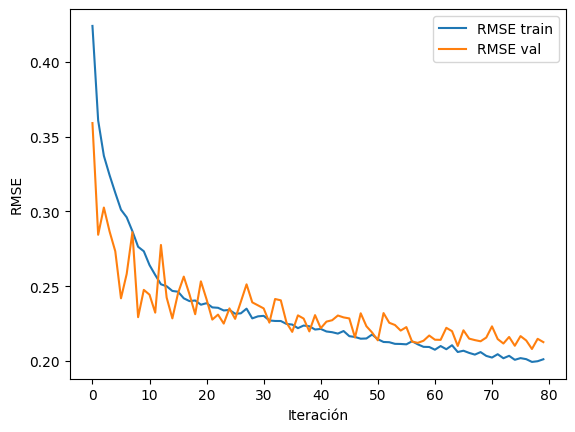

In [ ]:
0# Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('LSTM_1')

In [ ]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.196
  RMSE val:	 0.213
  RMSE test:	 0.209


In [ ]:
df_caudal

,anio,mes,Valor
0,1950,1,9266.000000
1,1950,1,9130.000000
2,1950,1,8926.000000
3,1950,1,8705.000000
4,1950,1,8370.000000
...,...,...,...
26783,2024,2,3045.375000
26784,2024,2,3057.234375
26785,2024,2,3097.968750
26786,2024,2,3046.921875


In [ ]:
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes
    de tiempo a futuro con el modelo entrenado.

    Entrada:
    - x: batch (o batches) de datos para ingresar al modelo
      (tamaño: BATCHES X INPUT_LENGTH X FEATURES)
    - model: Red LSTM entrenada
    - scaler: escalador (requerido para llevar la predicción a la escala original)

    Salida:
    - y_pred: la predicción en la escala original (tamaño: BATCHES X OUTPUT_LENGTH X FEATURES)
    '''

    # Calcular predicción escalada en el rango de -1 a 1
    y_pred_s = model.predict(x,verbose=0)

    # Llevar la predicción a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

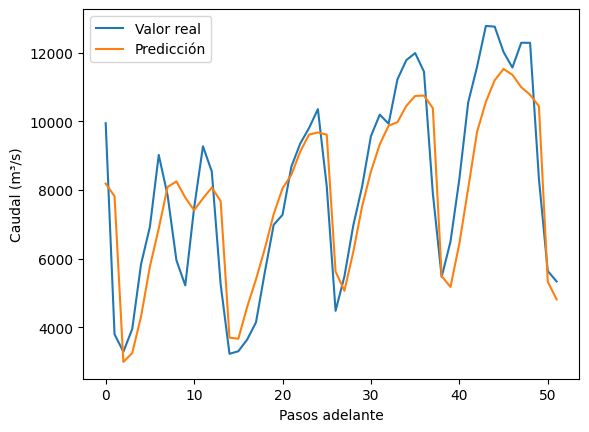

In [ ]:
# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_ts_s, modelo, scaler)
N = len(y_ts_pred)    # Número de predicciones

plt.plot(range(N), y_ts.flatten(), label='Valor real')
plt.plot(range(N), y_ts_pred, label='Predicción')
plt.xlabel("Pasos adelante")
plt.ylabel("Caudal (m³/s)")
plt.legend()
plt.savefig('LSTM1_pred')
plt.show()

In [ ]:
len(x_ts_s[0])

36